In [1]:
#Let's get started
import MetaTrader5       as mt5
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import pandas_ta         as ta

In [121]:
mt5.initialize()

True

In [122]:
#Fetch market data
SYMBOL    = "NZDJPY"
TIMEFRAME = mt5.TIMEFRAME_M1

In [123]:
data = pd.DataFrame(mt5.copy_rates_from_pos(SYMBOL,TIMEFRAME,0,300000))

In [124]:
data["time"]  = pd.to_datetime(data["time"],unit='s')

In [125]:
data.ta.rsi(length=20,append=True)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
299995    49.436636
299996    45.840971
299997    48.836421
299998    47.351988
299999    48.528330
Name: RSI_20, Length: 300000, dtype: float64

In [126]:
#Define the look ahead
look_ahead = 20

In [127]:
#Label the data
data["Target"] = np.nan

data.loc[data["close"] > data["close"].shift(-20),"Target"] = -1
data.loc[data["close"] < data["close"].shift(-20),"Target"] = 1

In [128]:
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

In [129]:
#Create a dataframe 
rsi_matrix = pd.DataFrame(columns=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"],index=[0])

In [131]:
data

,time,open,high,low,close,tick_volume,spread,real_volume,RSI_20,Target
0,2023-12-13 04:02:00,88.915,88.917,88.880,88.882,61,5,0,12.801448,1.0
1,2023-12-13 04:03:00,88.884,88.900,88.857,88.866,47,8,0,11.550448,1.0
2,2023-12-13 04:04:00,88.866,88.889,88.850,88.887,44,8,0,22.071736,1.0
3,2023-12-13 04:05:00,88.887,88.896,88.879,88.890,42,5,0,23.441188,1.0
4,2023-12-13 04:06:00,88.890,88.890,88.848,88.876,76,5,0,21.578436,1.0
...,...,...,...,...,...,...,...,...,...,...
297266,2024-10-02 21:14:00,91.566,91.572,91.554,91.570,65,5,0,48.157959,1.0
297267,2024-10-02 21:15:00,91.570,91.586,91.567,91.575,84,5,0,49.374567,-1.0
297268,2024-10-02 21:16:00,91.574,91.587,91.574,91.579,50,5,0,50.355648,-1.0
297269,2024-10-02 21:17:00,91.576,91.581,91.570,91.581,46,5,0,50.856887,-1.0


In [132]:
#Initialize the rsi matrix to 0
for i in np.arange(0,9):
    rsi_matrix.iloc[0,i] = 0

In [133]:
#Split the data into train and test sets
train = data.loc[:(data.shape[0]//2),:]
test  = data.loc[(data.shape[0]//2):,:]

In [18]:
for i in np.arange(0,train.shape[0]):
    #Fill in the rsi matrix, what happened in the future when we saw RSI readings below 10?
    if((train.loc[i,"RSI_20"] <= 10)):
        rsi_matrix.iloc[0,0] = rsi_matrix.iloc[0,0] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 11 and 20?
    if((train.loc[i,"RSI_20"] > 10) & (train.loc[i,"RSI_20"] <= 20)):
        rsi_matrix.iloc[0,1] = rsi_matrix.iloc[0,1] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 21 and 30?
    if((train.loc[i,"RSI_20"] > 20) & (train.loc[i,"RSI_20"] <= 30)):
        rsi_matrix.iloc[0,2] = rsi_matrix.iloc[0,2] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 31 and 40?
    if((train.loc[i,"RSI_20"] > 30) & (train.loc[i,"RSI_20"] <= 40)):
        rsi_matrix.iloc[0,3] = rsi_matrix.iloc[0,3] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 41 and 50?
    if((train.loc[i,"RSI_20"] > 40) & (train.loc[i,"RSI_20"] <= 50)):
        rsi_matrix.iloc[0,4] = rsi_matrix.iloc[0,4] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 51 and 60?
    if((train.loc[i,"RSI_20"] > 50) & (train.loc[i,"RSI_20"] <= 60)):
        rsi_matrix.iloc[0,5] = rsi_matrix.iloc[0,5] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 61 and 70?
    if((train.loc[i,"RSI_20"] > 60) & (train.loc[i,"RSI_20"] <= 70)):
        rsi_matrix.iloc[0,6] = rsi_matrix.iloc[0,6] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 71 and 80?
    if((train.loc[i,"RSI_20"] > 70) & (train.loc[i,"RSI_20"] <= 80)):
        rsi_matrix.iloc[0,7] = rsi_matrix.iloc[0,7] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 81 and 90?
    if((train.loc[i,"RSI_20"] > 80) & (train.loc[i,"RSI_20"] <= 90)):
        rsi_matrix.iloc[0,8] = rsi_matrix.iloc[0,8] + train.loc[i,"Target"]
    #What tends to happen in the future, after seeing RSI readings between 91 and 100?
    if((train.loc[i,"RSI_20"] > 90) & (train.loc[i,"RSI_20"] <= 100)):
        rsi_matrix.iloc[0,9] = rsi_matrix.iloc[0,9] + train.loc[i,"Target"]

In [109]:
rsi_matrix.iloc[0,0]

2.0

In [133]:
rsi_matrix

,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,4.0,47.0,221.0,1171.0,3786.0,945.0,-1159.0,-35.0,-3.0,NaN


<Axes: >

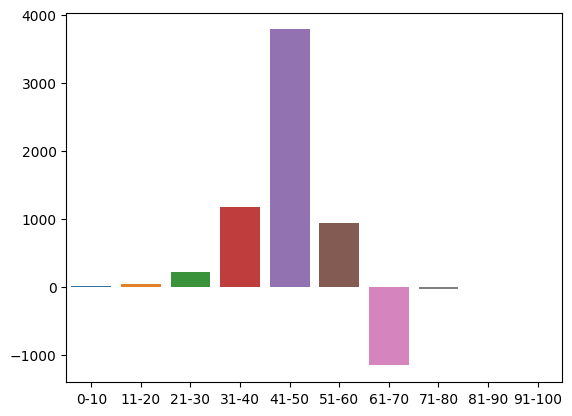

In [134]:
sns.barplot(rsi_matrix)

<Axes: >

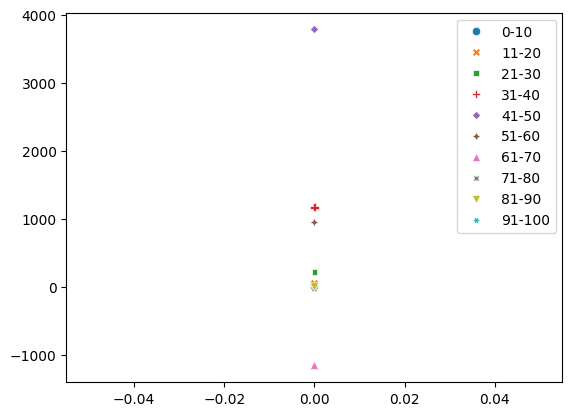

In [135]:
sns.scatterplot(rsi_matrix)

In [136]:
test.reset_index(inplace=True,drop=True)

In [137]:
test["Predictions"]  = np.nan

C:\users\volatily\Temp\ipykernel_672\2217816084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"]  = np.nan


In [138]:
rsi_matrix

,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,4.0,47.0,221.0,1171.0,3786.0,945.0,-1159.0,-35.0,-3.0,NaN


In [140]:
for i in np.arange(0,test.shape[0]):
    #Fill in the predictions
    if((test.loc[i,"RSI_20"] <= 10)):
        test.loc[i,"Predictions"] = 1
    
    if((test.loc[i,"RSI_20"] > 10) & (test.loc[i,"RSI_20"] <= 20)):
        test.loc[i,"Predictions"] = 1
    
    if((test.loc[i,"RSI_20"] > 20) & (test.loc[i,"RSI_20"] <= 30)):
        test.loc[i,"Predictions"] = 1
        
    if((test.loc[i,"RSI_20"] > 30) & (test.loc[i,"RSI_20"] <= 40)):
        test.loc[i,"Predictions"] = 1

    if((test.loc[i,"RSI_20"] > 40) & (test.loc[i,"RSI_20"] <= 50)):
        test.loc[i,"Predictions"] = 1

    if((test.loc[i,"RSI_20"] > 50) & (test.loc[i,"RSI_20"] <= 60)):
        test.loc[i,"Predictions"] = 1

    if((test.loc[i,"RSI_20"] > 60) & (test.loc[i,"RSI_20"] <= 70)):
        test.loc[i,"Predictions"] = -1

    if((test.loc[i,"RSI_20"] > 70) & (test.loc[i,"RSI_20"] <= 80)):
        test.loc[i,"Predictions"] = -1

    if((test.loc[i,"RSI_20"] > 80) & (test.loc[i,"RSI_20"] <= 90)):
        test.loc[i,"Predictions"] = -1

    if((test.loc[i,"RSI_20"] > 90) & (test.loc[i,"RSI_20"] <= 100)):
        test.loc[i,"Predictions"] = -1

In [142]:
test.loc[:,"Predictions"].isna().any()

False

In [144]:
(test["Target"] == test["Predictions"]).describe() 

count     148636
unique         2
top         True
freq       77409
dtype: object

In [146]:
#Our estimation of the model's accuracy
((test["Target"] == test["Predictions"]).describe().freq / (test["Target"] == test["Predictions"]).shape[0])

0.5207957695309346

In [84]:
val_err = []

In [ ]:
val_err.append(test.loc[(test["RSI_20"] < 10) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[test["RSI_20"] < 10].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 20) & (test["RSI_20"] > 10)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 20) & (test["RSI_20"] > 10))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 30) & (test["RSI_20"] > 20)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 30) & (test["RSI_20"] > 20))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 40) & (test["RSI_20"] > 30)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 40) & (test["RSI_20"] > 30))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 50) & (test["RSI_20"] > 40)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 50) & (test["RSI_20"] > 40))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 60) & (test["RSI_20"] > 50)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 60) & (test["RSI_20"] > 50))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 70) & (test["RSI_20"] > 60)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 70) & (test["RSI_20"] > 60))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 80) & (test["RSI_20"] > 70)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 80) & (test["RSI_20"] > 70))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 90) & (test["RSI_20"] > 80)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 90) & (test["RSI_20"] > 80))].shape[0])
val_err.append(test.loc[((test["RSI_20"] <= 100) & (test["RSI_20"] > 90)) & (test["Predictions"] == test["Target"])].shape[0] / test.loc[((test["RSI_20"] <= 100) & (test["RSI_20"] > 90))].shape[0])

In [ ]:
fifty = np.zeros(len(val_err)) + 0.5

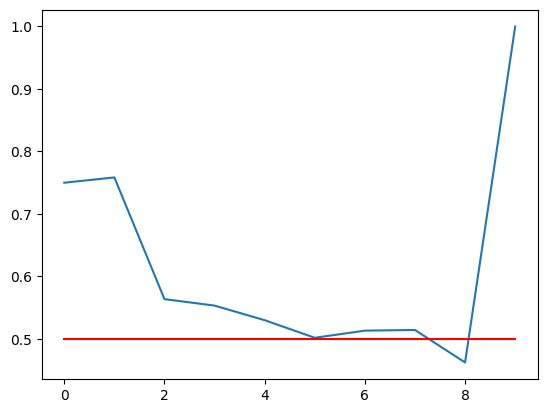

In [170]:
plt.plot(val_err)
plt.plot(fifty,'r')

In [176]:
## Sell when the RSI is in the 71-80 range
## Buy when the RSI is in the 11-20 range

In [175]:
rsi_matrix 

,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,4.0,47.0,221.0,1171.0,3786.0,945.0,-1159.0,-35.0,-3.0,NaN


In [171]:
val_err

[0.75,
 0.7584745762711864,
 0.5637051039697543,
 0.553356890459364,
 0.5300291545189504,
 0.5019061124514264,
 0.5133102424542306,
 0.5143699336772292,
 0.46236559139784944,
 1.0]

In [134]:
#Let us now try find a machine learning model to learn how to optimally use our transition matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,TimeSeriesSplit

In [135]:
#Now let us partition our train set into 2 halves 
train , train_val = train_test_split(train,shuffle=False,test_size=0.5)

In [144]:
#Now let us recalculate our transition matrix, based on the first half of the training set
rsi_matrix.iloc[0,0] = train.loc[(train["RSI_20"] < 10) & (train["Target"] == 1)].shape[0] / train.loc[(train["RSI_20"] < 10)].shape[0]
rsi_matrix.iloc[0,1] = train.loc[((train["RSI_20"] > 10) & (train["RSI_20"] <=20)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 10) & (train["RSI_20"] <=20))].shape[0]
rsi_matrix.iloc[0,2] = train.loc[((train["RSI_20"] > 20) & (train["RSI_20"] <=30)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 20) & (train["RSI_20"] <=30))].shape[0]
rsi_matrix.iloc[0,3] = train.loc[((train["RSI_20"] > 30) & (train["RSI_20"] <=40)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 30) & (train["RSI_20"] <=40))].shape[0]
rsi_matrix.iloc[0,4] = train.loc[((train["RSI_20"] > 40) & (train["RSI_20"] <=50)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 40) & (train["RSI_20"] <=50))].shape[0]
rsi_matrix.iloc[0,5] = train.loc[((train["RSI_20"] > 50) & (train["RSI_20"] <=60)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 50) & (train["RSI_20"] <=60))].shape[0]
rsi_matrix.iloc[0,6] = train.loc[((train["RSI_20"] > 60) & (train["RSI_20"] <=70)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 60) & (train["RSI_20"] <=70))].shape[0]
rsi_matrix.iloc[0,7] = train.loc[((train["RSI_20"] > 70) & (train["RSI_20"] <=80)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 70) & (train["RSI_20"] <=80))].shape[0]
rsi_matrix.iloc[0,8] = train.loc[((train["RSI_20"] > 80) & (train["RSI_20"] <=90)) & (train["Target"] == 1)].shape[0] / train.loc[((train["RSI_20"] > 80) & (train["RSI_20"] <=90))].shape[0]

rsi_matrix

,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
0,1.0,0.655172,0.541701,0.536398,0.53243,0.516551,0.460306,0.491154,0.395349,0


In [137]:
fifty = np.zeros(10) + 0.5

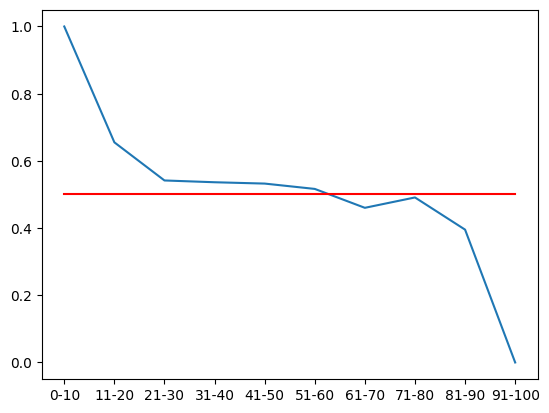

In [143]:
#From the training set, it appears that RSI readings above 61 are bearish and RSI readings below 61 are bullish
plt.plot(rsi_matrix.iloc[0,:])
plt.plot(fifty,'r')

In [145]:
#Let's now store our model's predictions
train["Predictions"] = -1
train.loc[train["RSI_20"] < 61,"Predictions"] = 1

In [146]:
train_val["Predictions"] = -1
train_val.loc[train_val["RSI_20"] < 61,"Predictions"] = 1

In [147]:
test["Predictions"] = -1
test.loc[test["RSI_20"] < 61,"Predictions"] = 1

C:\users\volatily\Temp\ipykernel_808\2753584207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = -1


In [148]:
#Let's Standardize and scale our data
from sklearn.preprocessing import RobustScaler

In [181]:
ohlc_predictors = ["open","high","low","close","tick_volume","spread","RSI_20"]
transition_matrix = ["Predictions"]
all_predictors = ohlc_predictors + transition_matrix
target = ["Target"]

In [151]:
scaler = RobustScaler()
scaler =  scaler.fit(train.loc[:,predictors])
train_scaled = pd.DataFrame(scaler.transform(train.loc[:,predictors]),columns=predictors)
train_val_scaled = pd.DataFrame(scaler.transform(train_val.loc[:,predictors]),columns=predictors)
test_scaled = pd.DataFrame(scaler.transform(test.loc[:,predictors]),columns=predictors)

In [171]:
#Create a dataframe to store our cv error on the training set, validation training set and the test set
train_err     = pd.DataFrame(columns=["Transition Matrix","Deep Markov Model","OHLC Model","All Model"],index=np.arange(0,5)) 
train_val_err = pd.DataFrame(columns=["Transition Matrix","Deep Markov Model","OHLC Model","All Model"],index=[0]) 
test_err      = pd.DataFrame(columns=["Transition Matrix","Deep Markov Model","OHLC Model","All Model"],index=[0]) 

In [161]:
#Create a time series split object
tscv = TimeSeriesSplit(n_splits = 5,gap=look_ahead)

In [204]:
train_scaled["Predictions"] = train["Predictions"]
train_val_scaled["Predictions"] = train_val["Predictions"]
test_scaled["Predictions"] = test["Predictions"]

In [217]:
model = MLPClassifier(hidden_layer_sizes=(20,10))
for i , (train_index,test_index) in enumerate(tscv.split(train_scaled)):
    #Fit the model
    model.fit(train.loc[train_index,transition_matrix],train.loc[train_index,"Target"])
    #Record its accuracy
    train_err.iloc[i,1] = accuracy_score(train.loc[test_index,"Target"],model.predict(train.loc[test_index,transition_matrix]))

#Record our accuracy levels on the validation training set
train_val_err.iloc[0,1] = accuracy_score(train_val.loc[:,"Target"],model.predict(train_val.loc[:,transition_matrix]))

#Record our accuracy levels on the test set
test_err.iloc[0,1] = accuracy_score(test.loc[:,"Target"],model.predict(test.loc[:,transition_matrix]))

#Our accuracy levels on the training set
train_err

,Transition Matrix,Deep Markov Model,OHLC Model,All Model
0,0.526965,0.511303,0.49128,0.493541
1,NaN,0.52527,0.509042,0.521718
2,NaN,0.508639,0.529146,0.529388
3,NaN,0.553286,0.487647,0.512756
4,NaN,0.53843,0.487647,0.498305


In [218]:
train_val_err.iloc[0,0] = train_val.loc[train_val["Predictions"] == train_val["Target"]].shape[0] / train_val.shape[0]
train_val_err

,Transition Matrix,Deep Markov Model,OHLC Model,All Model
0,0.52309,0.52309,0.507306,0.517291


In [220]:
test_err.iloc[0,0] = test.loc[test["Predictions"] == test["Target"]].shape[0] / test.shape[0]
test_err

,Transition Matrix,Deep Markov Model,OHLC Model,All Model
0,0.519322,0.519322,0.497127,0.496724
